In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important; }</stule>"))

In [2]:
%matplotlib widget
# Load packages and settings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)
import seaborn as sns


import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
plt.rcParams.update(parameters)

from matplotlib import cm # Colormaps
import matplotlib.colors as colors
# cmap = plt.cm.get_cmap('Dark2',len(ageGroups))

import locale
import matplotlib.dates as mdates
locale.setlocale(locale.LC_TIME,"Danish")
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# ax1.spines['top'].set_visible(False) 

import os
# import csv
import math

from datetime import date
# import datetime

saveFigures = True
# saveFigures = False
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

# Define running mean functions
def rnMean(data,meanWidth):
    return np.convolve(data, np.ones(meanWidth)/meanWidth, mode='valid')
def rnTime(t,meanWidth):
    return t[math.floor(meanWidth/2):-math.ceil(meanWidth/2)+1]

saveFigures is set to: True
Done loading packages


In [3]:
stmf = pd.read_csv("stmf.csv")

In [4]:
stmf.head()

,CountryCode,Year,Week,Sex,D0_14,D15_64,D65_74,D75_84,D85p,DTotal,R0_14,R15_64,R65_74,R75_84,R85p,RTotal,Split,SplitSex,Forecast
0,AUS2,2015,1,m,5.037600,210.962400,204.0,398.0,394.0,1212.0,0.000113,0.001395,0.010716,0.041683,0.119154,0.005326,1,0,0
1,AUS2,2015,1,f,6.758007,141.241993,154.0,323.0,676.0,1301.0,0.000160,0.000929,0.007869,0.028785,0.118644,0.005641,1,0,0
2,AUS2,2015,1,b,11.795607,352.204393,358.0,721.0,1070.0,2513.0,0.000136,0.001161,0.009273,0.034714,0.118831,0.005484,1,0,0
3,AUS2,2015,2,m,5.648218,166.351782,216.0,343.0,399.0,1130.0,0.000127,0.001100,0.011347,0.035923,0.120666,0.004966,1,0,0
4,AUS2,2015,2,f,6.983274,149.016726,147.0,290.0,646.0,1239.0,0.000166,0.000980,0.007511,0.025844,0.113378,0.005372,1,0,0


In [5]:
stmf['YearWeek'] = stmf.Year.astype(str) + stmf.Week.apply(lambda x: '{0:0>2}'.format(x))
stmf['Date'] = pd.to_datetime(stmf.YearWeek.astype(str)+'1',format='%G%V%u')
stmf_dk = stmf.loc[stmf['CountryCode'] == "DNK"]
stmf_dk_total = stmf_dk.loc[stmf_dk['Sex'] == "b"]


In [6]:
stmf_dk_total

,CountryCode,Year,Week,Sex,D0_14,D15_64,D65_74,D75_84,D85p,DTotal,...,R15_64,R65_74,R75_84,R85p,RTotal,Split,SplitSex,Forecast,YearWeek,Date
23870,DNK,2007,1,b,3.0,245.0,189.0,362.0,374.0,1173.0,...,0.003533,0.021294,0.068285,0.182253,0.011169,0,0,0,200701,2007-01-01
23873,DNK,2007,2,b,5.0,201.0,221.0,373.0,409.0,1209.0,...,0.002899,0.024900,0.070360,0.199309,0.011512,0,0,0,200702,2007-01-08
23876,DNK,2007,3,b,5.0,224.0,188.0,308.0,338.0,1063.0,...,0.003230,0.021182,0.058099,0.164710,0.010122,0,0,0,200703,2007-01-15
23879,DNK,2007,4,b,2.0,182.0,204.0,294.0,340.0,1022.0,...,0.002625,0.022984,0.055458,0.165685,0.009731,0,0,0,200704,2007-01-22
23882,DNK,2007,5,b,11.0,207.0,208.0,338.0,346.0,1110.0,...,0.002985,0.023435,0.063758,0.168608,0.010569,0,0,0,200705,2007-01-29
23885,DNK,2007,6,b,6.0,250.0,170.0,317.0,369.0,1112.0,...,0.003605,0.019154,0.059796,0.179816,0.010588,0,0,0,200706,2007-02-05
23888,DNK,2007,7,b,6.0,209.0,217.0,328.0,359.0,1119.0,...,0.003014,0.024449,0.061871,0.174943,0.010655,0,0,0,200707,2007-02-12
23891,DNK,2007,8,b,6.0,246.0,231.0,380.0,393.0,1256.0,...,0.003548,0.026027,0.071680,0.191512,0.011959,0,0,0,200708,2007-02-19
23894,DNK,2007,9,b,6.0,243.0,195.0,383.0,429.0,1256.0,...,0.003504,0.021970,0.072246,0.209055,0.011959,0,0,0,200709,2007-02-26
23897,DNK,2007,10,b,10.0,246.0,197.0,344.0,387.0,1184.0,...,0.003548,0.022196,0.064889,0.188588,0.011274,0,0,0,200710,2007-03-05


In [7]:
#stmf_dk_total.loc[stmf_dk_total["Forecast"]==1]
for col in stmf_dk_total.columns:
    print(col)

CountryCode
Year
Week
Sex
D0_14
D15_64
D65_74
D75_84
D85p
DTotal
R0_14
R15_64
R65_74
R75_84
R85p
RTotal
Split
SplitSex
Forecast
YearWeek
Date


In [8]:
stmf_dk_total_recent = stmf_dk_total.loc[stmf_dk_total["Year"]==2021]

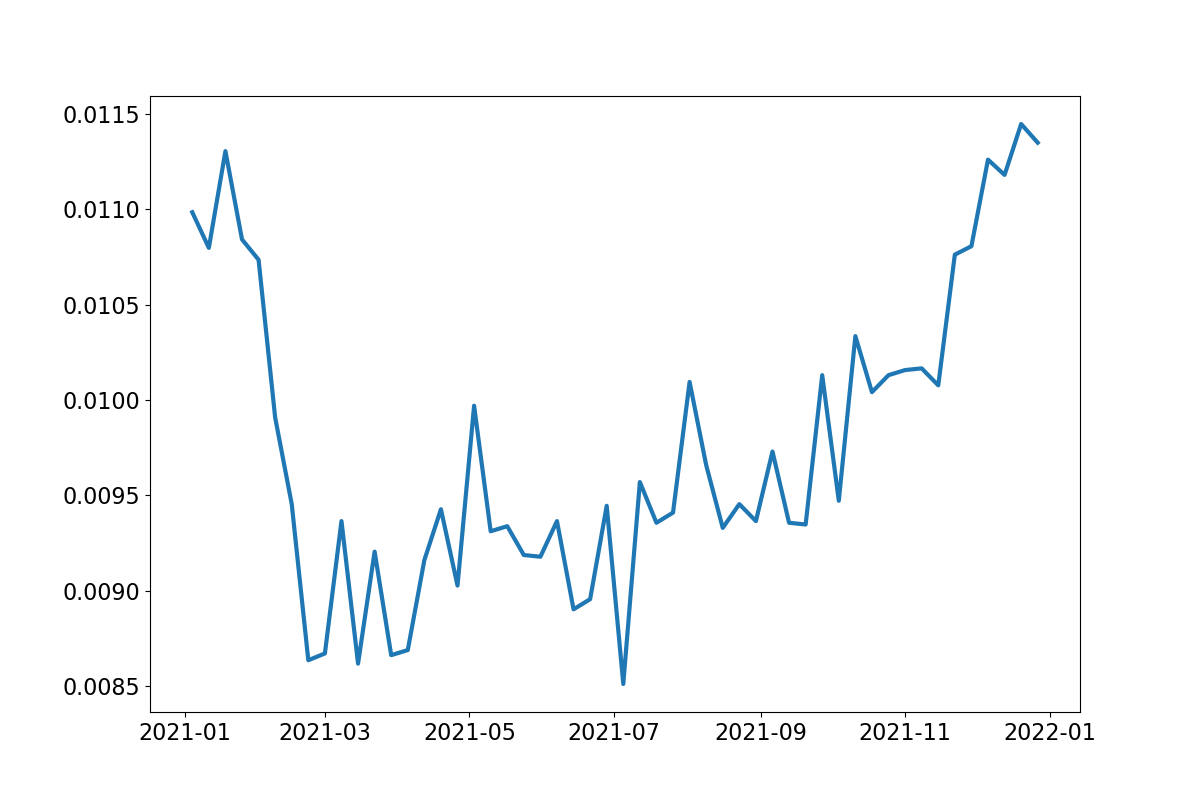

In [9]:
fig,ax1 = plt.subplots(1,1)
ax1.plot(stmf_dk_total_recent["Date"],stmf_dk_total_recent["RTotal"])

In [10]:
#fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)
#ax1.plot(stmf_dk_total["YearWeek"],stmf_dk_total["DTotal"])
#ax2.set_xlim(left=np.datetime64('2000-01'),right=np.datetime64('2022-01'))

# Find aldersopløsning af vaccinations status

In [11]:
# Define paths
rootdir_data = os.getcwd() +"\\..\\DanskeData\\" 

path_data = rootdir_data + "ssi_data\\"
path_dash = rootdir_data + "ssi_dashboard\\"
path_vacc = rootdir_data + "ssi_vacc\\"
path_figs = os.getcwd() +"\\..\\Figures\\" 

In [12]:
latestsubdir = list(os.walk(path_data))[0][1][-5] #-5 da det er den senste tirsdags fil. Skal ændres hvis der pulles, og helst automatiseres på en smart måde. (evt find en tidligere tirsdag og tæl 5 filer frem til den nyeste?)
latestdir = path_data + latestsubdir
df_alle_inc = pd.read_csv(latestdir+'\gennembrudsinfektioner_table2_incidence_alle.csv', encoding='utf8',
                          delimiter = ';',decimal=",",index_col = "Aldersgruppe")
df_cases = pd.read_csv(latestdir+'\gennembrudsinfektioner_table2_antal_cases.csv', encoding='utf8',
                       delimiter = ';', index_col = "Aldersgruppe")

In [13]:
cases_uge8 = df_cases.iloc[: , :5]
cases_uge7 = df_cases.iloc[: , 5:10]

In [14]:
#Totals er individer i grupperne. Da af cases over incidens pr 100.000
df_totals = df_cases/df_alle_inc*100000
df_totals

,Uge 08-2022_Ingen vaccination,Uge 08-2022_Første vaccination,Uge 08-2022_Anden vaccination,Uge 08-2022_Fuld effekt efter primært forløb,Uge 08-2022_Fuld effekt efter revaccination,Uge 07-2022_Ingen vaccination,Uge 07-2022_Første vaccination,Uge 07-2022_Anden vaccination,Uge 07-2022_Fuld effekt efter primært forløb,Uge 07-2022_Fuld effekt efter revaccination,...,Uge 46-2021_Ingen vaccination,Uge 46-2021_Første vaccination,Uge 46-2021_Anden vaccination,Uge 46-2021_Fuld effekt efter primært forløb,Uge 46-2021_Fuld effekt efter revaccination,Uge 45-2021_Ingen vaccination,Uge 45-2021_Første vaccination,Uge 45-2021_Anden vaccination,Uge 45-2021_Fuld effekt efter primært forløb,Uge 45-2021_Fuld effekt efter revaccination
Aldersgruppe,,,,,,,,,,,,,,,,,,,,,
0-5,354001.921514,5120.373697,1.169173e+04,1.125736e+04,NaN,354251.487629,5555.828703,1.170354e+04,1.098476e+04,NaN,...,3.771636e+05,10.000000,NaN,NaN,NaN,3.758315e+05,NaN,NaN,NaN,NaN
6-11,139722.644377,27836.355968,1.416931e+05,1.386002e+05,NaN,147717.257183,32115.171650,1.439425e+05,1.385681e+05,NaN,...,3.663417e+05,NaN,NaN,NaN,NaN,3.653659e+05,NaN,NaN,NaN,NaN
12-15,37077.625571,5612.065942,2.063645e+05,2.048968e+05,7.090128e+02,41534.598444,5710.043967,2.083642e+05,2.065965e+05,6.709957e+02,...,7.226225e+04,16205.533597,1.815673e+05,1.777778e+05,NaN,7.898328e+04,11903.270267,1.805869e+05,1.765590e+05,NaN
16-19,20802.888335,2502.001601,2.223789e+05,1.351839e+05,8.655299e+04,23340.657518,2770.733540,2.238226e+05,1.377300e+05,8.544498e+04,...,3.660706e+04,6077.284715,2.311679e+05,2.295478e+05,571.918788,3.695508e+04,5124.450952,2.296025e+05,2.283918e+05,394.944708
20-29,108615.451389,11168.892566,5.945038e+05,1.907820e+05,3.990514e+05,110764.519056,11865.011184,5.916488e+05,1.973032e+05,3.896091e+05,...,1.635603e+05,24238.751704,5.882002e+05,5.667933e+05,17033.356991,1.705686e+05,20901.710140,5.884007e+05,5.722704e+05,11673.151751
30-39,93260.938997,9151.620084,5.535651e+05,1.849534e+05,3.646316e+05,95535.638554,9691.381257,5.583985e+05,1.936681e+05,3.608699e+05,...,1.374473e+05,21630.615641,5.489920e+05,5.183318e+05,26160.337553,1.451086e+05,17343.107456,5.461859e+05,5.227866e+05,19534.184823
40-49,58071.625344,4157.218443,6.272137e+05,9.033290e+04,5.327941e+05,57982.927600,4485.753248,6.305126e+05,9.499165e+04,5.316255e+05,...,7.865497e+04,9918.218201,6.461983e+05,6.118041e+05,32745.591940,8.242424e+04,7864.841247,6.440719e+05,6.201968e+05,22388.059701
50-59,42512.783053,2979.810265,7.244988e+05,5.370157e+04,6.681440e+05,43379.685611,2887.712413,7.272538e+05,5.687410e+04,6.680385e+05,...,5.515964e+04,5705.925384,7.408385e+05,6.958121e+05,44334.975369,5.638530e+04,4708.652148,7.416268e+05,7.094353e+05,31250.000000
60-64,13411.876085,902.787809,3.255063e+05,1.485119e+04,3.099519e+05,13865.231314,821.428571,3.268769e+05,1.614968e+04,3.102609e+05,...,1.720430e+04,1562.093205,3.305498e+05,3.044628e+05,25939.177102,1.746180e+04,990.099010,3.299539e+05,3.111310e+05,18674.136321


### Tjek om gruppe antallet er det samme over ugerne løbende

In [15]:
#Opdeling af vaccinationsgrupperne i uger
#Vælg gruppe med g = index_nr for gruppe
def choose_g(g):
    week_totals =  []
    for i in reversed(range(16)):
        wt_i = df_totals.iloc[g , i*5:i*5+5].values
        week_totals.append(wt_i)

    Ingen_vaccination = [float(Ingen_vaccination[:1][0]) for Ingen_vaccination in week_totals]
    Første_vaccination = [float(Første_vaccination[1:2][0]) for Første_vaccination in week_totals]
    Anden_vaccination = [float(Anden_vaccination [2:3][0]) for Anden_vaccination in week_totals]
    primært_forløb = [float(primært_forløb[3:4][0]) for primært_forløb in week_totals]
    revaccination = [float(revaccination[4:5][0]) for revaccination in week_totals]
    return Ingen_vaccination, Første_vaccination, Anden_vaccination, primært_forløb,revaccination



In [16]:
def sum_lists(l1,l2):
    S_l = []
    for i in range(len(l1)):
        S_l.append(l1[i]+l2[i])
    return S_l

In [17]:
def Group_sums(group_list):
    N_in_age_group = sum_lists(sum_lists(sum_lists(group_list[0],group_list[1]),sum_lists(group_list[2],group_list[3])),group_list[4])
    return N_in_age_group

In [18]:
#Tjek for NaN groups:
#Groups with no NaN: 3-13, NaN in 0,1,2
# age = choose_g(3)
# Group_sums(age)

In [19]:
#hardcorded uge ticks til plot. Starter ved den tidligste uge (16 uger fra den givene start uge.) Måske det er letter hvis jeg laver det til datetime?
uge_list = []
year_list = []
uge_start = 8
for i in range(16):
    u_i=uge_start-i
    y_i =2022
    if u_i < 1:
        u_i = 52 + u_i
        y_i = 2021
    uge_list.insert(0,u_i)
    year_list.insert(0,y_i)

uge_list = pd.Series(uge_list)
year_list = pd.Series(year_list)
time = pd.to_datetime((year_list*100+uge_list).astype(str)+'1',format='%G%V%u')
yt = year_list*100+uge_list

Text(0.5, 1.0, 'Tidsserie af aldersgruppersstørrelser')

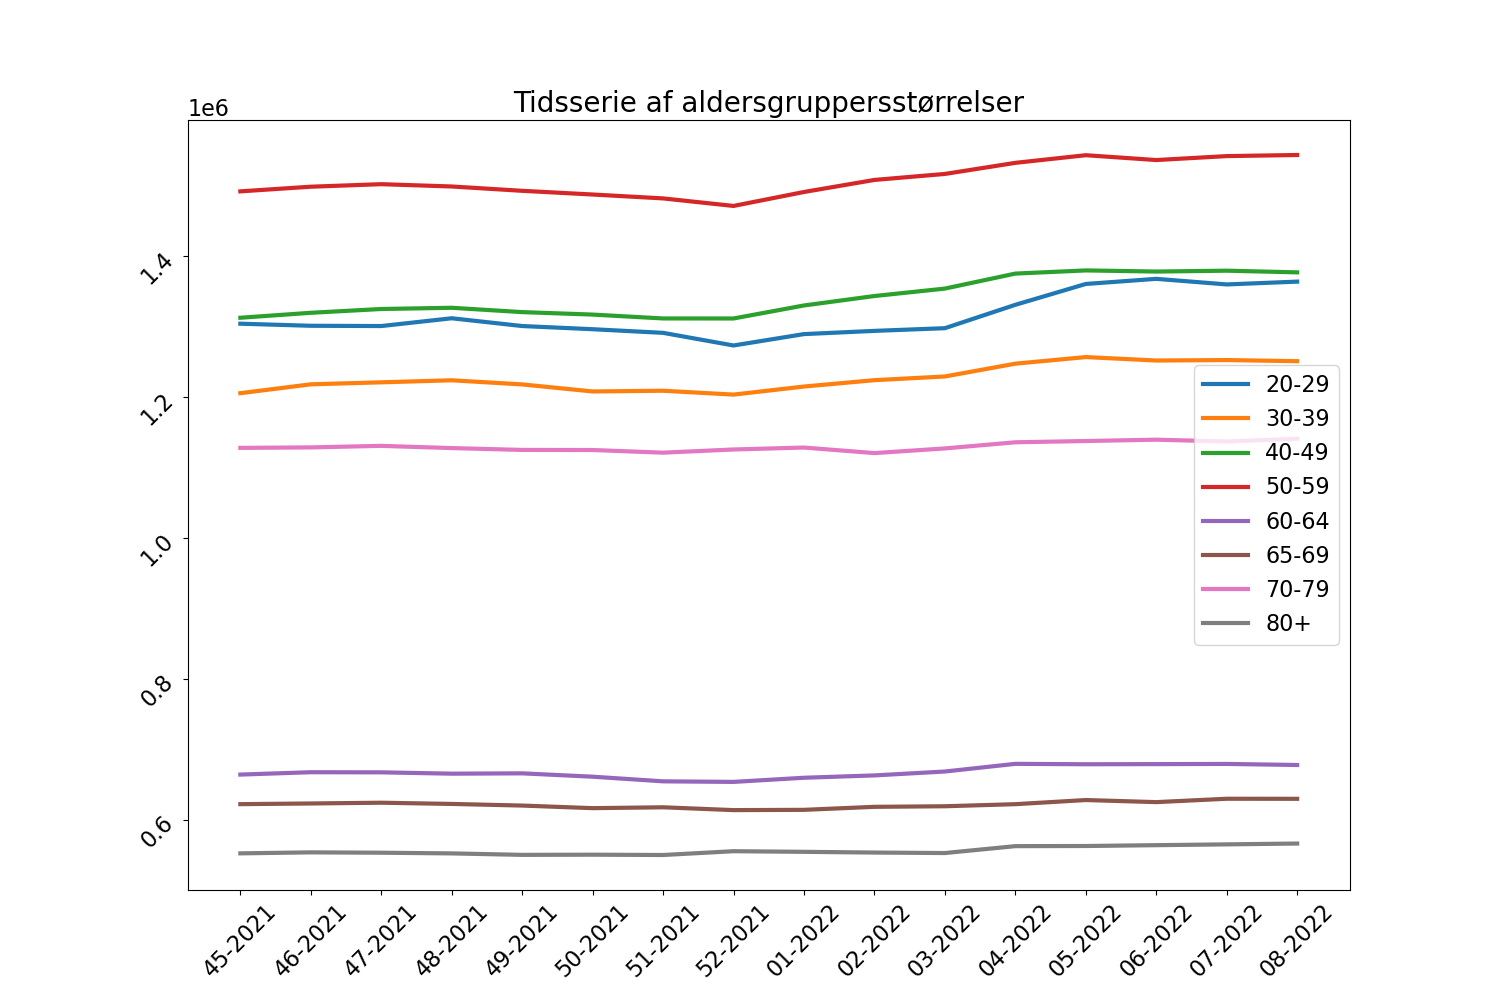

In [20]:
fig = plt.figure(figsize=(15,10))
ax2 = fig.add_subplot()

index_list = df_totals.index.values.tolist()

for i in range(4,12):
    age_group = choose_g(i)
    g_S = Group_sums(age_group)
    g_S.reverse() # Vender rækkefølgen om, sådan at den ældste sum kommer først. 
    ax2.plot(time.dt.strftime('%U-%Y'),g_S,label=index_list[i])
ax2.legend()
ax2.tick_params(labelrotation=45)
ax2.set_title("Tidsserie af aldersgruppersstørrelser")

## Find hvad ændringen er fra uge til uge i antallet i aldersgrupperne
### Se om det passer med at dem der forsvinder fra en grupper kommer over i den næste aldersgruppe

In [21]:
age_group = choose_g(4)
g_S = Group_sums(age_group)
g_S.reverse()

In [22]:
def dif_fun(g_S):
    g_S_dif = []
    for i in range(len(g_S)):
        dif = g_S[i]-g_S[i-1]
        g_S_dif.append(dif)
    g_S_dif = g_S_dif[1:]
    return g_S_dif

Text(0.5, 1.0, 'Tidsserie af ændringer i aldersgrupperne')

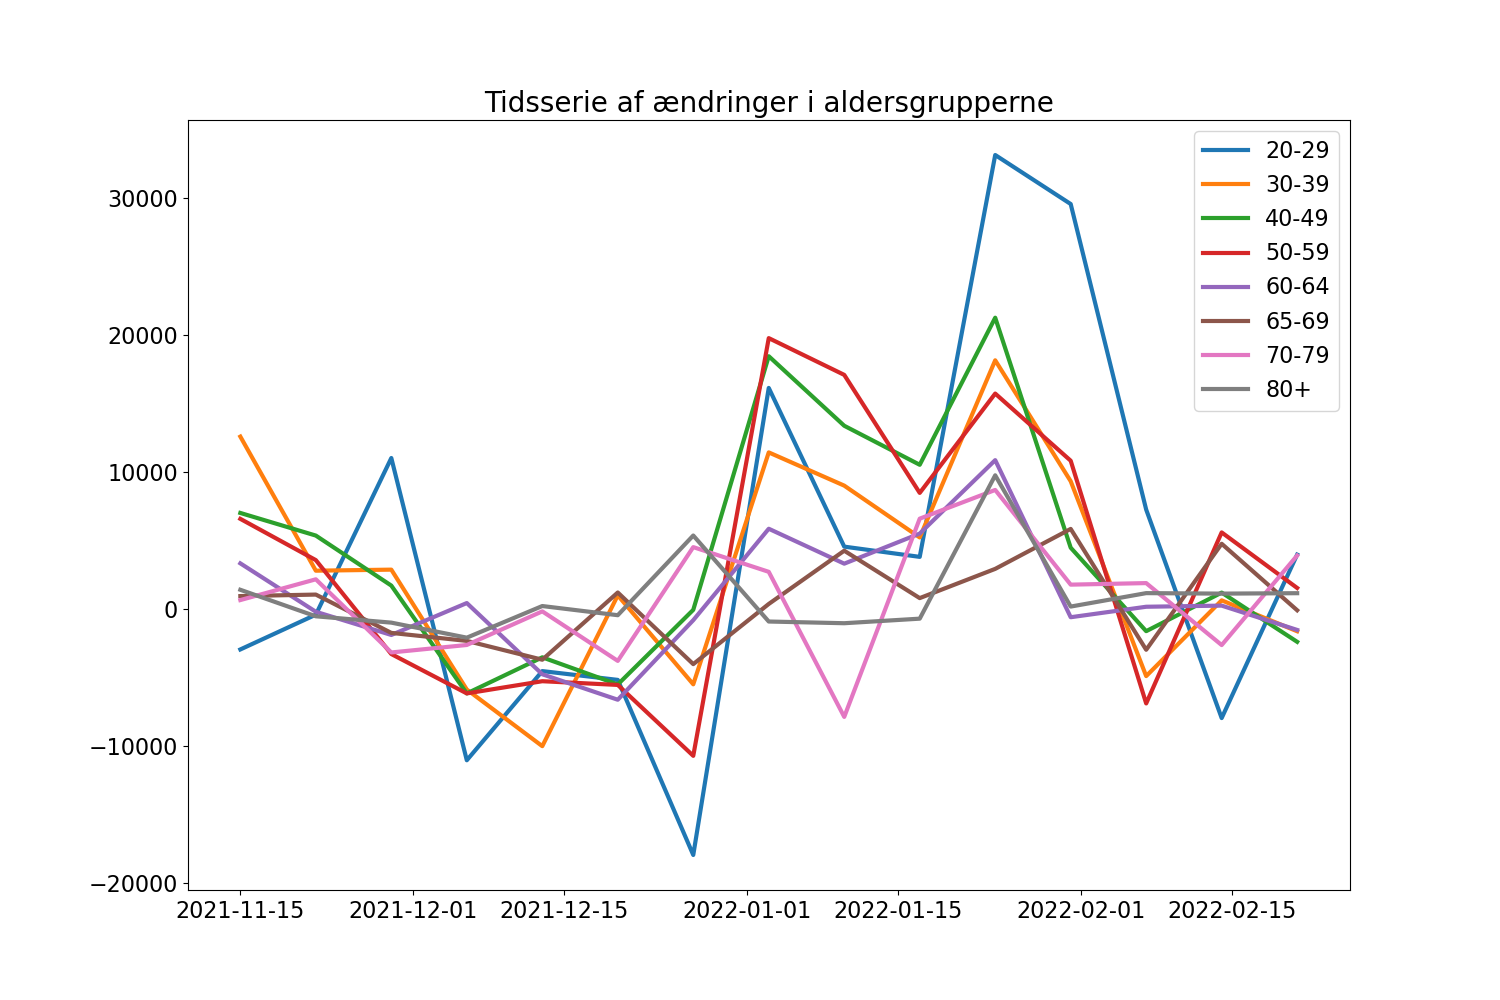

In [23]:
fig = plt.figure(figsize=(15,10))
ax5 = fig.add_subplot()

index_list = df_totals.index.values.tolist()
age_sum = []
for i in range(4,12):
    age_group = choose_g(i)
    g_S = Group_sums(age_group)
    g_S.reverse() # Vender rækkefølgen om, sådan at den ældste sum kommer først.
    dif_gS = dif_fun(g_S)
    ax5.plot(time[1:],dif_gS,label=index_list[i])
    age_sum.append(sum(dif_gS))
ax5.legend()
ax5.set_title("Tidsserie af ændringer i aldersgrupperne")

Text(0.5, 1.0, 'Summer af aldersgrupperne i ugerne: \n 45-2021 til 08-2022 ')

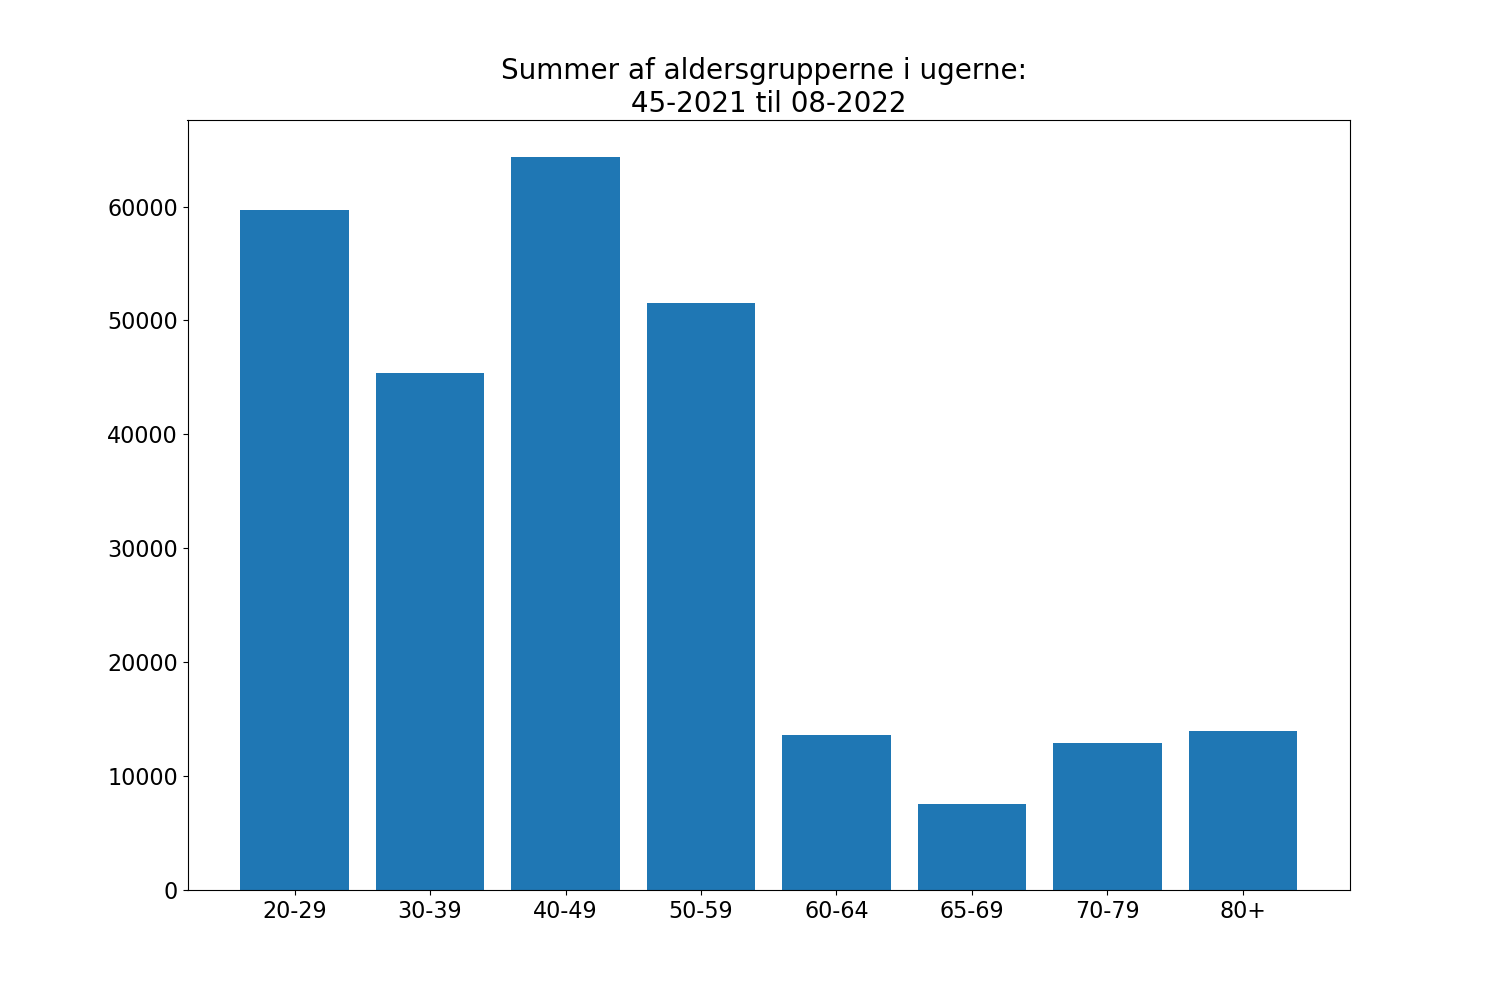

In [24]:
fig = plt.figure(figsize=(15,10))
ax4 = fig.add_subplot()
ax4.bar(index_list[4:12],age_sum)
ax4.set_title("Summer af aldersgrupperne i ugerne: \n 45-2021 til 08-2022 ")

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Ugentlig forskel på antal i aldersgruppe')

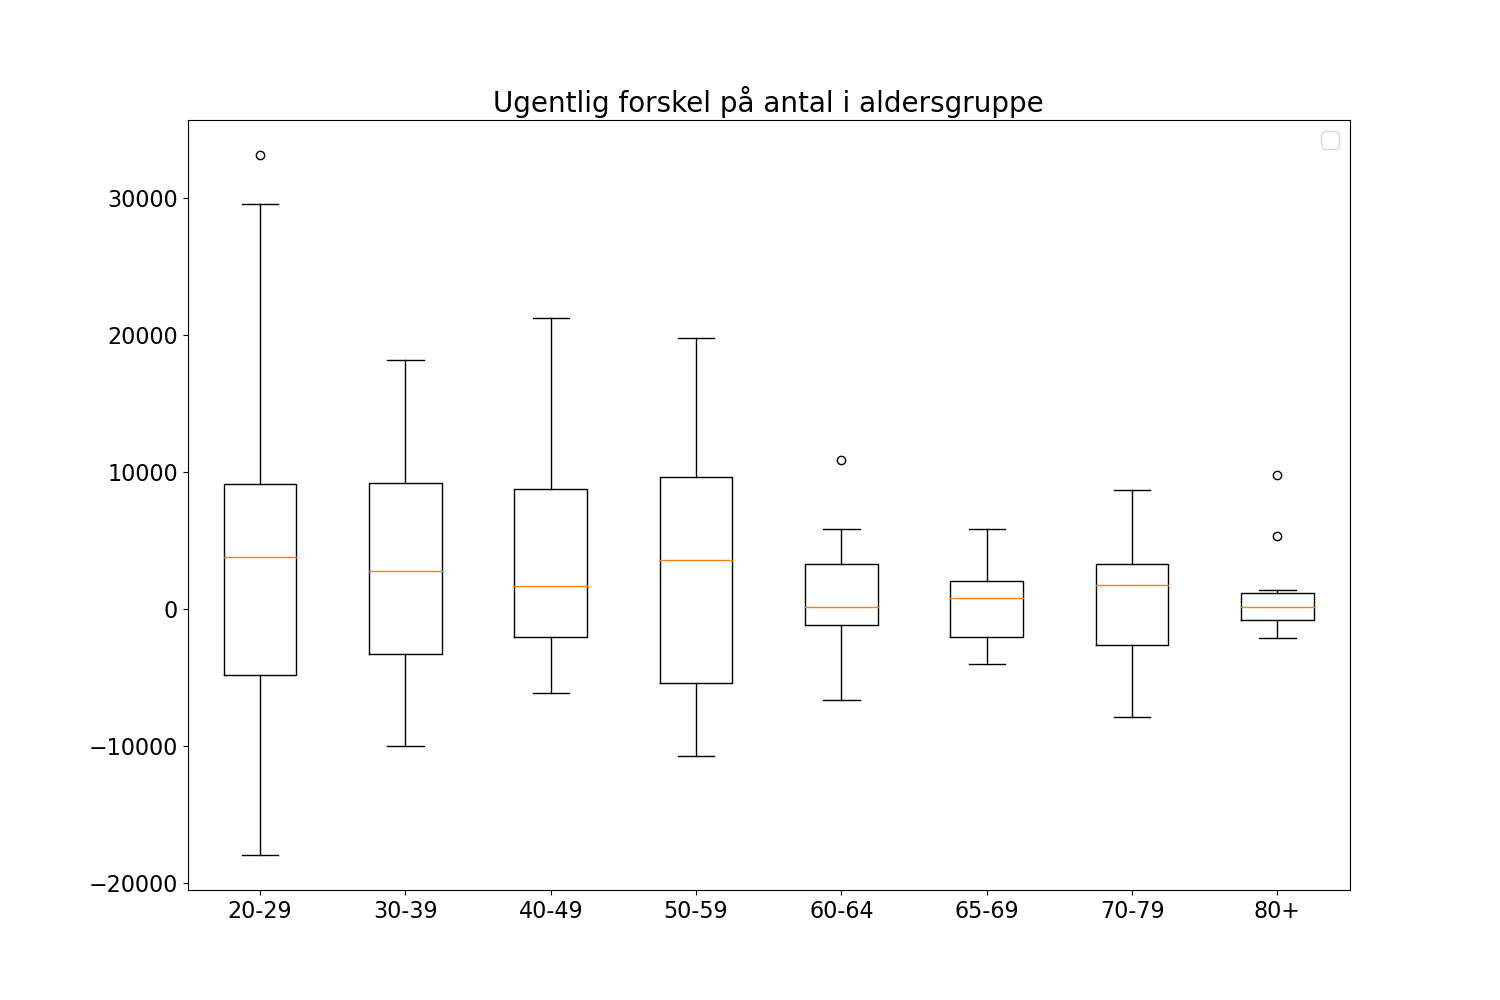

In [25]:
fig = plt.figure(figsize=(15,10))
ax3 = fig.add_subplot()

index_list = df_totals.index.values.tolist()
dif_list = []
for i in range(4,12):
    age_group = choose_g(i)
    g_S = Group_sums(age_group)
    g_S.reverse() # Vender rækkefølgen om, sådan at den ældste sum kommer først.
    dif_gS = dif_fun(g_S)
    dif_list.append(dif_gS)

ax3.boxplot(dif_list,labels=index_list[4:12])
ax3.legend()
ax3.set_title("Ugentlig forskel på antal i aldersgruppe")
#plt.savefig('ugentlig delta boxplot')

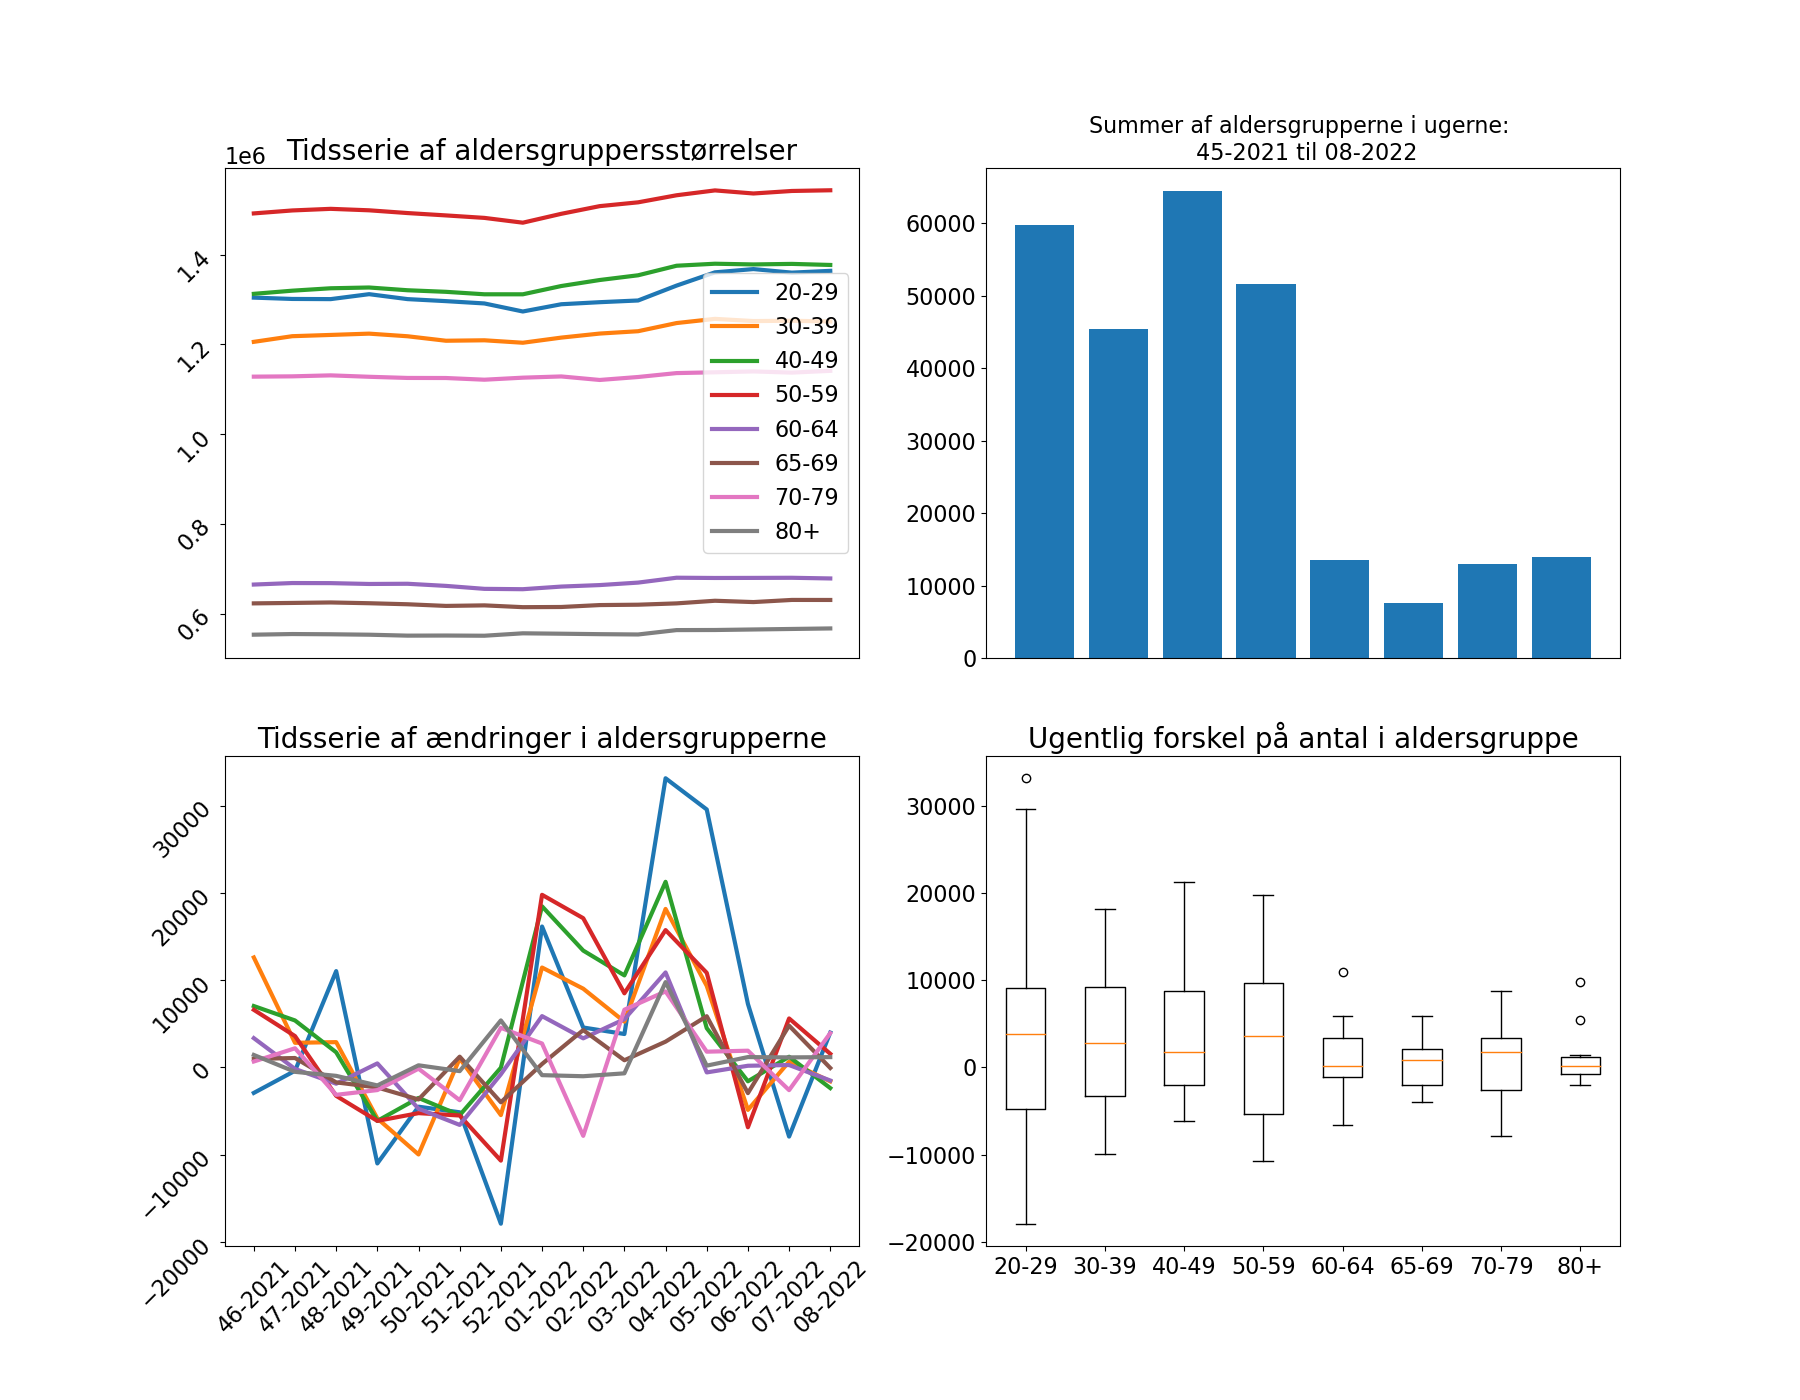

In [39]:
fig,allAxes = plt.subplots(2,2,figsize=(18,14))
ax1,ax2,ax3,ax4 = allAxes.flatten()

index_list = df_totals.index.values.tolist()

for i in range(4,12):
    age_group = choose_g(i)
    g_S = Group_sums(age_group)
    g_S.reverse() # Vender rækkefølgen om, sådan at den ældste sum kommer først. 
    ax1.plot(time.dt.strftime('%U-%Y'),g_S,label=index_list[i])
ax1.legend()
ax1.tick_params(labelrotation=45,bottom="Off")
ax1.get_xaxis().set_visible(False)
ax1.set_title("Tidsserie af aldersgruppersstørrelser")


age_sum = []
for i in range(4,12):
    age_group = choose_g(i)
    g_S = Group_sums(age_group)
    g_S.reverse() # Vender rækkefølgen om, sådan at den ældste sum kommer først.
    dif_gS = dif_fun(g_S)
    ax3.plot(time[1:].dt.strftime('%U-%Y'),dif_gS,label=index_list[i])
    age_sum.append(sum(dif_gS))
ax3.tick_params(labelrotation=45)
ax3.set_title("Tidsserie af ændringer i aldersgrupperne")
#ax3.legend()

ax2.bar(index_list[4:12],age_sum)
ax2.set_title("Summer af aldersgrupperne i ugerne: \n 45-2021 til 08-2022",fontsize=16)
ax2.get_xaxis().set_visible(False)

dif_list = []
for i in range(4,12):
    age_group = choose_g(i)
    g_S = Group_sums(age_group)
    g_S.reverse() # Vender rækkefølgen om, sådan at den ældste sum kommer først.
    dif_gS = dif_fun(g_S)
    dif_list.append(dif_gS)

ax4.boxplot(dif_list,labels=index_list[4:12])
ax4.set_title("Ugentlig forskel på antal i aldersgruppe")

plt.savefig("Aldersgruppe_størrelser")

In [27]:
plt.close("all")

## Gammel kode til plot af en gruppes vaccinations status over tid

In [28]:
# week_totals =  []
# for i in reversed(range(16)):
#     wt_i = df_totals.iloc[-1 , i*5:i*5+5].values
#     week_totals.append(wt_i)

# Ingen_vaccination = [float(Ingen_vaccination[:1][0]) for Ingen_vaccination in week_totals]
# Første_vaccination = [float(Første_vaccination[1:2][0]) for Første_vaccination in week_totals]
# Anden_vaccination = [float(Anden_vaccination [2:3][0]) for Anden_vaccination in week_totals]
# primært_forløb = [float(primært_forløb[3:4][0]) for primært_forløb in week_totals]
# revaccination = [float(revaccination[4:5][0]) for revaccination in week_totals]

In [29]:
#hardcorded uge ticks til plot. Starter ved den tidligste uge (16 uger fra den givene start uge.) Måske det er letter hvis jeg laver det til datetime?
# uge_list = []
# year_list = []
# uge_start = 8
# for i in range(16):
#     u_i=uge_start-i
#     y_i =2022
#     if u_i < 1:
#         u_i = 52 + u_i
#         y_i = 2021
#     uge_list.insert(0,u_i)
#     year_list.insert(0,y_i)

In [30]:
#pd.to_datetime(pd.Series(uge_list) + year_list, format='%W%Y')
# uge_list = pd.Series(uge_list)
# year_list = pd.Series(year_list)
# time = pd.to_datetime((year_list*100+uge_list).astype(str)+'1',format='%G%V%u')

In [31]:
## Plot forsøg, xtickslabels forsvinder når jeg giver axerne navne. Desuden virker kwag ikke inde i xticks, måske mangler jeg en opdatering?
### Se evt https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.axes.Axes.set_xticks.html#matplotlib.axes.Axes.set_xticks 
# labels = ["Ingen vaccination","Første vaccination","Anden vaccination","Fuld effekt efter primært forløb","Fuld effekt efter revaccination"]

# fig = plt.figure(figsize=(15,10))
# ax1 = fig.add_subplot()
# ax1.plot(time,Ingen_vaccination,label=labels[0])
# ax1.plot(time,Første_vaccination,label=labels[1])
# ax1.plot(time,Anden_vaccination,label=labels[2])
# ax1.plot(time,primært_forløb,label=labels[3])
# ax1.plot(time,revaccination,label=labels[4])
# ax1.legend(labels)
# # ax1.set_xticks(range(16))
# # ax1.set_xticklabels(uge_list)
# ax1.set_ylabel("Total I vaccinations gruppe")


## Find ugentlige cases fra cases by age til sammentligning
$$\Delta\text{mandag }\text{uge }n=\text{mandag }\text{uge }n-\text{mandag }\text{uge }n-1$$

In [32]:
def cba_week(week_from_ni, ni = -11):

    latestsubdir = list(os.walk(path_data))[0][1][ni-week_from_ni] #ni er indexet for mandag i uge n (fx uge 8 i 2021 er mandag d.2021-02-21) (kan man automatisere det ved at finde nuværende uge?)
    latestdir = path_data + latestsubdir

    df_cases_2 = pd.read_csv(latestdir+'\Cases_by_age.csv', encoding='utf8',
                              delimiter = ';',decimal=",", index_col = "Aldersgruppe", thousands='.')
    
    prev_week = 5*(1 + int(week_from_ni))
    latestsubdir = list(os.walk(path_data))[0][1][ni-prev_week]
    latestdir = path_data + latestsubdir

    df_cases_1 = pd.read_csv(latestdir+'\Cases_by_age.csv', encoding='utf8',
                              delimiter = ';',decimal=",", index_col = "Aldersgruppe", thousands='.')
    df_cases_ugeX = df_cases_2 - df_cases_1
    return df_cases_ugeX

In [33]:
#Uge 8
cba_week(0)

,Antal_bekræftede_COVID-19,Antal_testede,Procent_positive
Aldersgruppe,,,
0-9,16629,324,3.0
10-19,23835,-1130,3.5
20-29,36942,636,4.7
30-39,35147,2988,4.8
40-49,34423,425,4.6
50-59,37857,3000,4.8
60-69,27516,4225,4.4
70-79,17443,4242,3.5
80-89,5736,2158,2.9


In [34]:
#Uge 7
cba_week(1)

,Antal_bekræftede_COVID-19,Antal_testede,Procent_positive
Aldersgruppe,,,
0-9,41909,346,7.7
10-19,62006,-1936,9.1
20-29,77659,3200,9.8
30-39,70015,5007,9.7
40-49,65174,2618,8.7
50-59,61939,5248,7.8
60-69,42231,7154,6.8
70-79,24064,6243,4.9
80-89,7613,3122,3.9


### Hvorfor er der negative tal i antal tests? 
#### Tjeck om de nu også er kumulative

In [35]:
df_cases_1.iloc[: , 0].values

NameError: name 'df_cases_1' is not defined

In [ ]:
s = np.array([])
ni = -11
for i in range(50):
    ni = i*5+i
    latestsubdir = list(os.walk(path_data))[0][1][ni] #ni er indexet for mandag i uge n (fx uge 8 i 2021 er mandag d.2021-02-21) (kan man automatisere det ved at finde nuværende uge?)
    latestdir = path_data + latestsubdir
    df_cases_i = pd.read_csv(latestdir+'\Cases_by_age.csv', encoding='utf8',
                          delimiter = ';',decimal=",", index_col = "Aldersgruppe", thousands='.')
    
    s = np.append(s,df_cases_i.iloc[-1: , 0].values)

NameError: name 's' is not defined

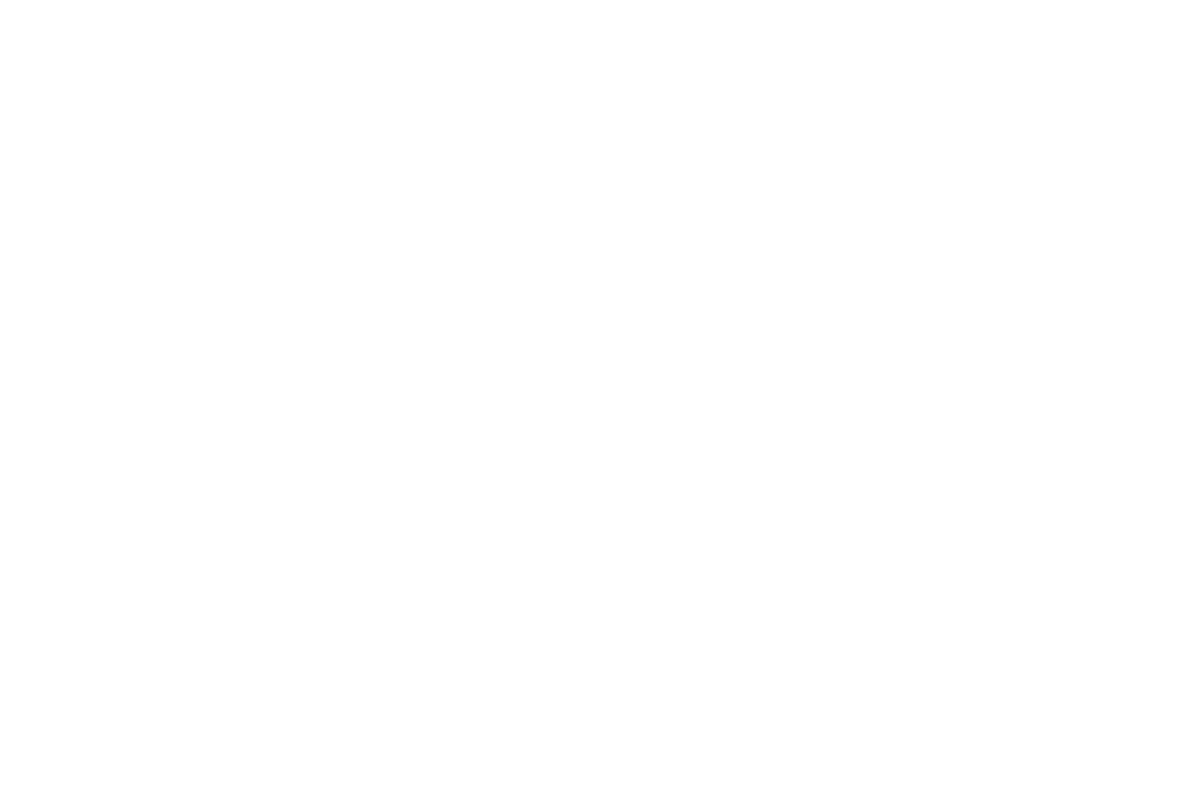

In [36]:
#Figur over total antal bekræftede tilfælde
plt.figure()
plt.plot(range(len(s)),s)

In [37]:
s = np.array([])
ni = -11
for i in range(50):
    ni = i*5+i
    latestsubdir = list(os.walk(path_data))[0][1][ni] #ni er indexet for mandag i uge n (fx uge 8 i 2021 er mandag d.2021-02-21) (kan man automatisere det ved at finde nuværende uge?)
    latestdir = path_data + latestsubdir
    df_cases_i = pd.read_csv(latestdir+'\Cases_by_age.csv', encoding='utf8',
                          delimiter = ';',decimal=",", index_col = "Aldersgruppe", thousands='.')
    
    s = np.append(s,df_cases_i.iloc[-1: , 1].values)

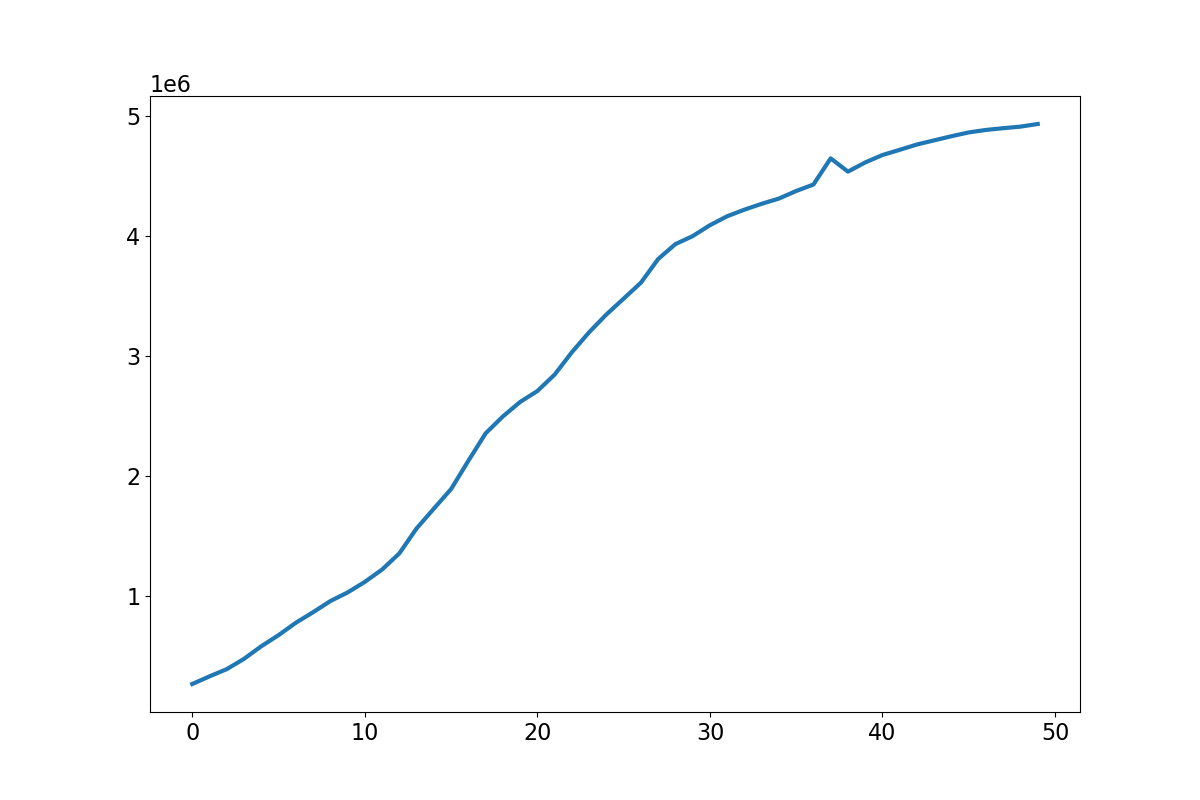

In [38]:
#Figur over antal_testede
plt.figure()
plt.plot(range(len(s)),s)